In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from karateclub import Graph2Vec
from karateclub.dataset import GraphSetReader
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from karateclub import LDP

# Random data

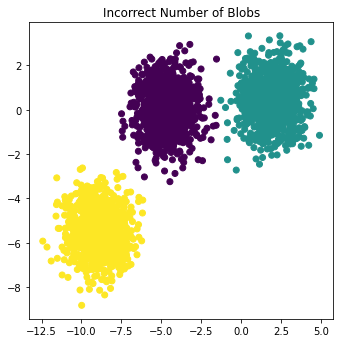

In [2]:
n_samples = 3000
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X)
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")
plt.show()

# Reddit 10k data

In [3]:
reader = GraphSetReader("reddit10k") #  two types - discussion and non-discussion based ones.
X_graphs = reader.get_graphs()[:1000]
Y_label = reader.get_target()[:1000]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_graphs, Y_label, train_size=0.80, test_size=0.20, random_state=42)
print(
"x_train length:", len(X_train),"\n"
"x_test length:", len(X_test)
)

x_train length: 800 
x_test length: 200


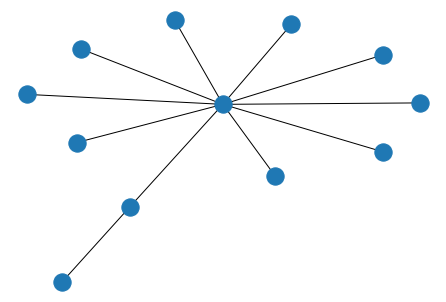

In [6]:
nx.draw(X_train[2])

In [10]:
model = Graph2Vec(dimensions=10, epochs=40)
model.fit(X_train)
X_embedding = model.get_embedding()
initkmeans = KMeans(n_clusters=2, random_state=47)
initkmeans.fit(X_embedding)
y_pred = initkmeans.predict(X_embedding)
print(f1_score(y_train, y_pred))
print(y_train)
print(y_pred)

c:\users\16sic\appdata\local\programs\python\python37\lib\site-packages\gensim\models\doc2vec.py:315: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")


0.6373831775700934
[1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1
 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1
 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1
 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0
 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0
 0 1 1

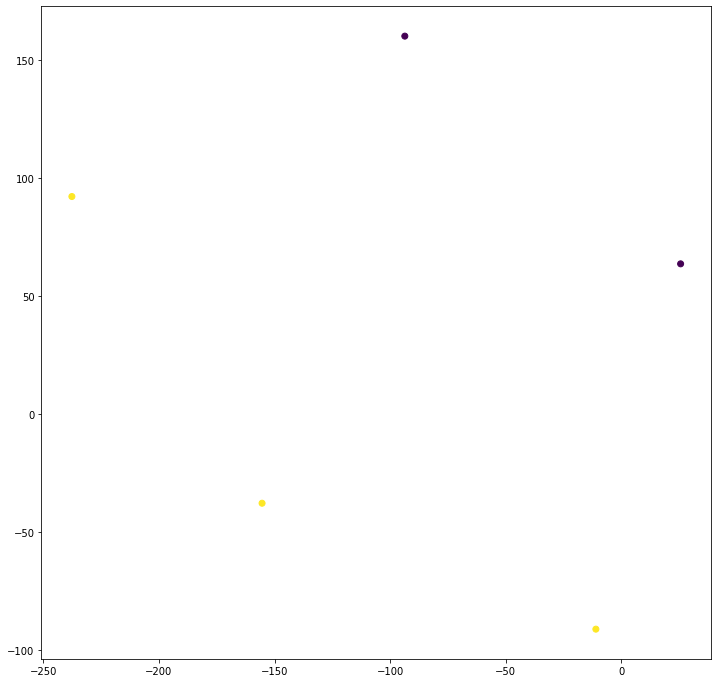

In [72]:
X_embedded = TSNE(n_components=2).fit_transform(X_embedding)
plt.figure(figsize=(12, 12))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred)
plt.show()

In [117]:
model = Graph2Vec(dimensions=20, epochs=1)
model.fit(X_test)
X_embedding = model.get_embedding()
y_pred = initkmeans.predict(X_embedding)
print(f1_score(y_test, y_pred))
print(y_test)
print(y_pred)

0.48936170212765956
[0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1
 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0]
[0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0]


c:\users\16sic\appdata\local\programs\python\python37\lib\site-packages\gensim\models\doc2vec.py:315: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
